# `Heart Disease Prediction`

# Import Basic Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [55]:
# import dataset

In [56]:
df_origin = pd.read_csv('heart.csv')
df = df_origin.copy()


# EDA 

In [57]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [59]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [60]:

df.duplicated().sum()

np.int64(0)

In [61]:
df['HeartDisease'].value_counts()
# equally distributed 

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [62]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

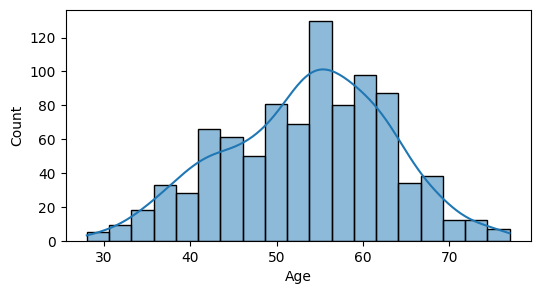

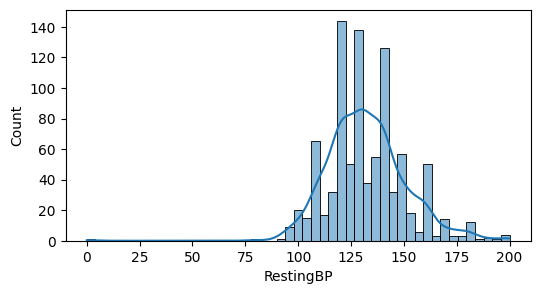

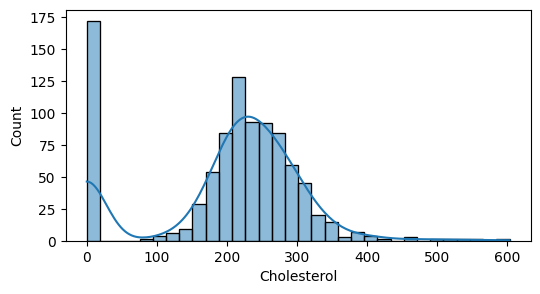

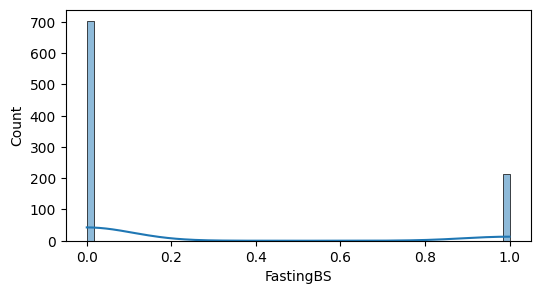

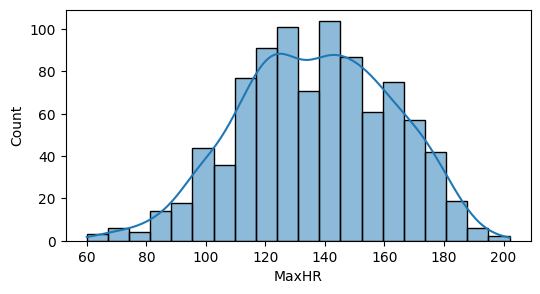

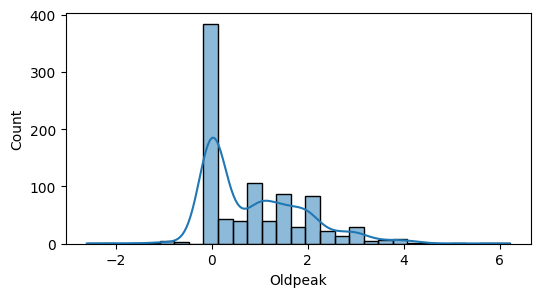

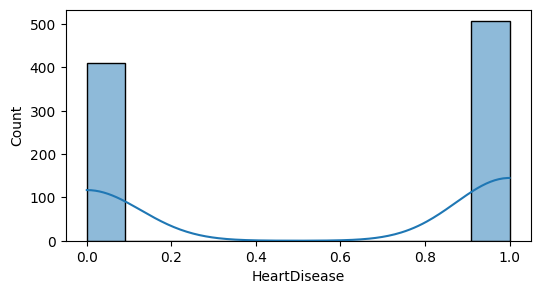

In [ ]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']
def show(arr,plot_name):
       for col in num_col:
       plt.figure(figsize=(6,3))
       sns.histplot(df[col],kde=True)

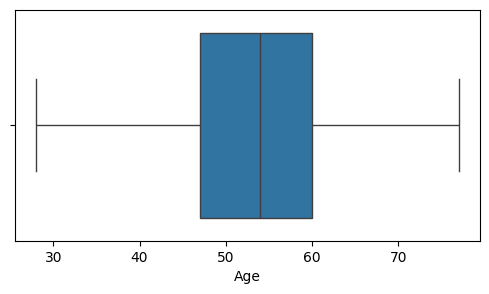

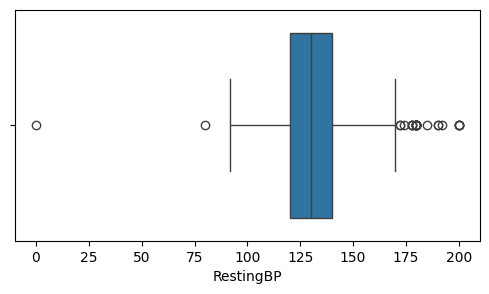

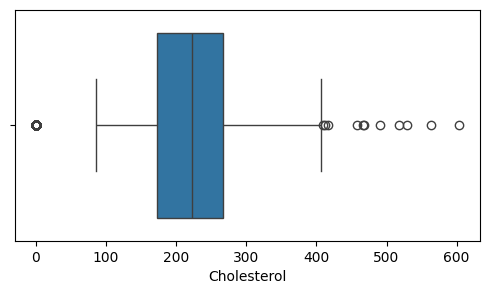

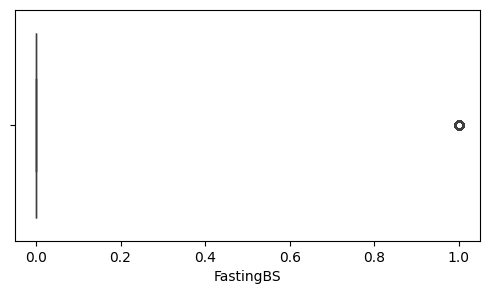

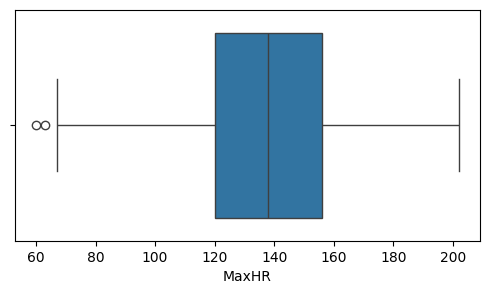

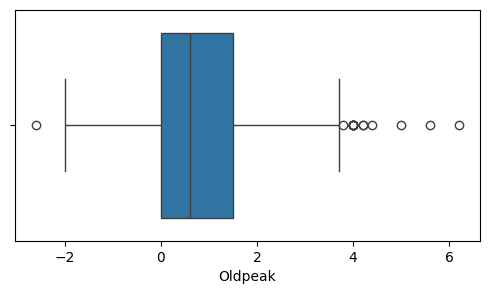

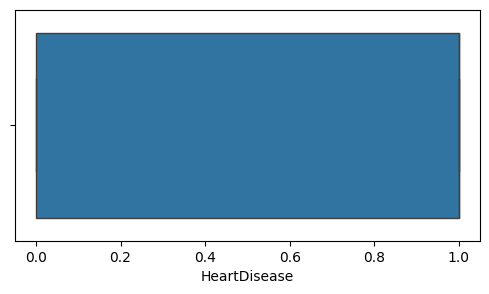

In [64]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x = df[col])

In [65]:
# Cleaning the data - Resting bp and Cholesterol has some issues in distribution

In [66]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [67]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [68]:
rb_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
rb_mean

np.float64(132.54089422028352)

In [69]:
df['RestingBP'] = df['RestingBP'].replace(0,rb_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [70]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
535,56,M,ASY,130.0,244.64,0,LVH,122,Y,1.0,Flat,1
124,58,M,ATA,130.0,230.00,0,Normal,150,N,0.0,Up,0
864,60,M,ASY,145.0,282.00,0,LVH,142,Y,2.8,Flat,1
95,58,M,ASY,130.0,263.00,0,Normal,140,Y,2.0,Flat,1
121,52,F,NAP,125.0,272.00,0,Normal,139,N,0.0,Up,0
65,37,F,ATA,120.0,260.00,0,Normal,130,N,0.0,Up,0
416,63,M,ASY,140.0,260.00,0,ST,112,Y,3.0,Flat,1
207,35,M,ATA,110.0,257.00,0,Normal,140,N,0.0,Flat,1
84,56,M,ASY,150.0,213.00,1,Normal,125,Y,1.0,Flat,1
721,51,M,NAP,100.0,222.00,0,Normal,143,Y,1.2,Flat,0
